In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
state = 'RI'
ri_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\RI\T653_Rhode_Island_CD.xlsx",
                             header=11, usecols='J, K, L, M, Y, Z, AA, AM, AN, AO') 
print(ri_excel)

    Unnamed: 9 Occupation  Dollars  Cents Occupation.1  Dollars.1  Cents.1  \
0           RI        NaN    590.0   86.0          NaN      295.0     43.0   
1           RI    Esquire    563.0   88.0      Esquire      281.0     94.0   
2           RI    Esquire    864.0   28.0      Esquire      432.0     14.0   
3           RI     Farmer   1333.0   33.0       Farmer      666.0     66.0   
4           RI    Esquire     29.0   50.0      Esquire       14.0     74.0   
..         ...        ...      ...    ...          ...        ...      ...   
657        NaN        NaN      NaN    NaN          NaN       18.0     78.0   
658        NaN        NaN      NaN    NaN          NaN        NaN      NaN   
659        NaN        NaN      NaN    NaN          NaN       22.0     56.0   
660        NaN        NaN      NaN    NaN          NaN       17.0      5.0   
661        NaN        NaN      NaN    NaN          NaN       10.0     10.0   

    Occupation.2  Dollars.2  Cents.2  
0            NaN      21

In [55]:
ri_excel = ri_excel.rename(columns={'Unnamed: 9':'State'})
ri_excel = ri_excel.loc[ri_excel['State'] == state]
ri_excel.drop('State', axis=1, inplace=True)
print(ri_excel)

                                            Occupation   Dollars  Cents  \
0                                                  NaN     590.0   86.0   
1                                              Esquire     563.0   88.0   
2                                              Esquire     864.0   28.0   
3                                               Farmer    1333.0   33.0   
4                                              Esquire      29.0   50.0   
..                                                 ...       ...    ...   
579   General Treasurer of the state of Rhode Islan...  199740.0   67.0   
596                                           Merchant     164.0   96.0   
616                                            Esquire      59.0   90.0   
617                                             Yeoman      28.0   44.0   
632                                           Merchant     142.0   44.0   

                                          Occupation.1  Dollars.1  Cents.1  \
0                    

In [56]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    no_occ_copy[['Cents', 'Cents.1', 'Cents.2']] = no_occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = no_occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format

def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    occ_copy[['Cents', 'Cents.1', 'Cents.2']] = occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

def plot(excel):
    no_occ = get_debt_no_job(excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed
    occ = get_debt_w_job(excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    print(len(no_occ))
    print(len(occ))
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend

11
441


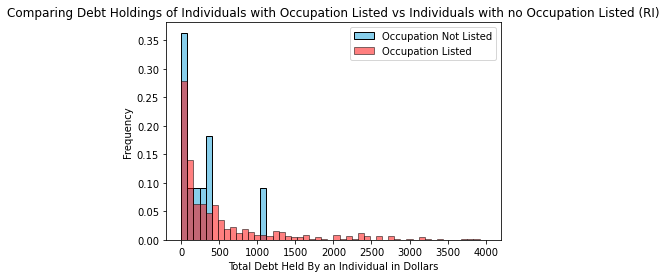

In [57]:
plot(ri_excel)